In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #  

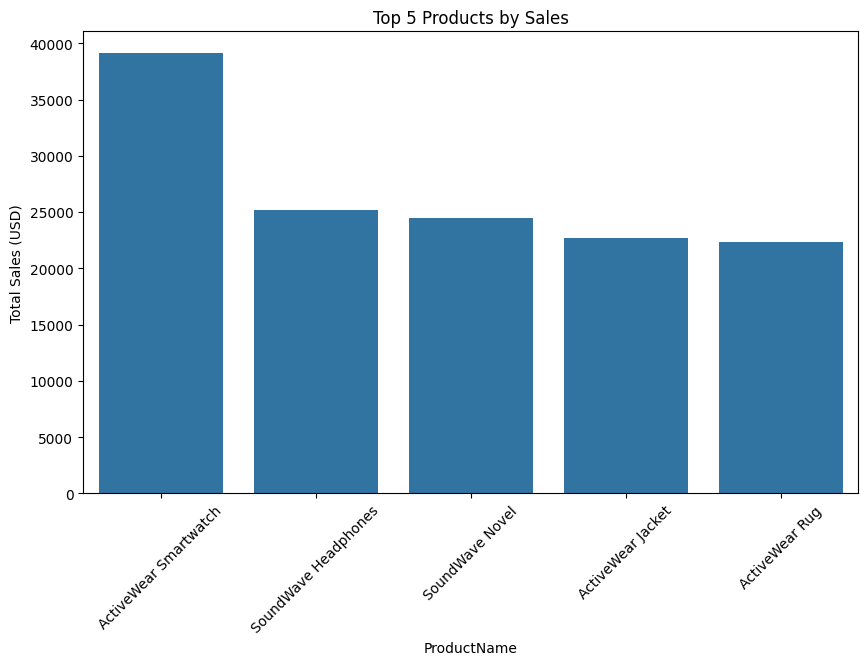

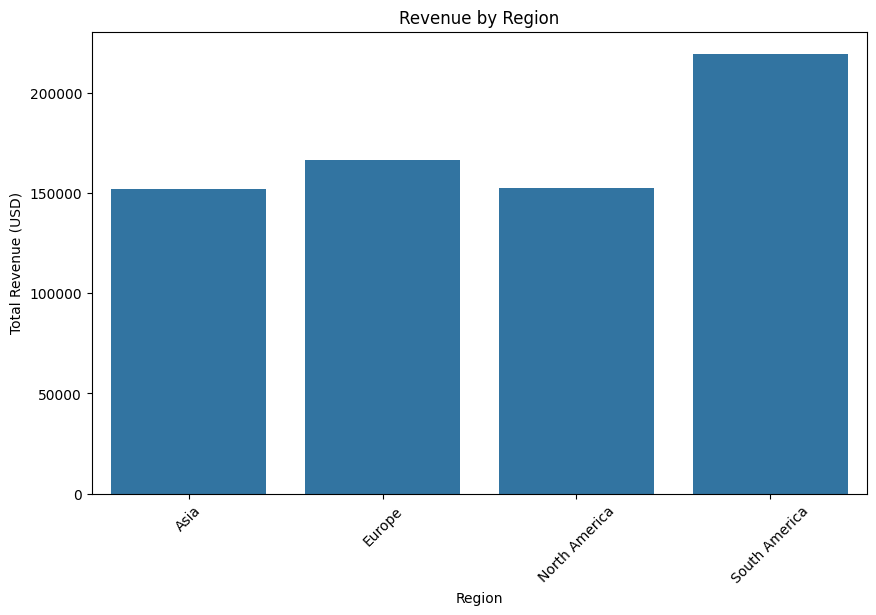

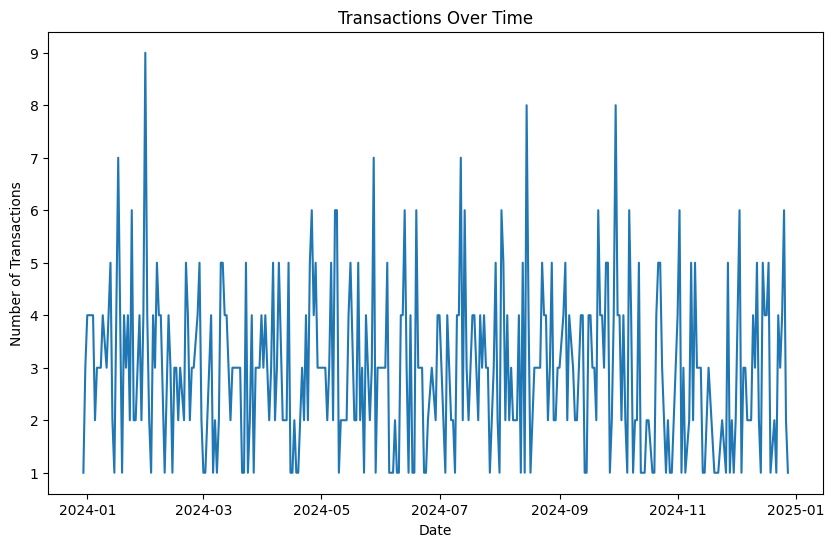

In [9]:
#Task 1
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display basic info about datasets
print("Customers Dataset Info:")
print(customers.info(), "\n")

print("Products Dataset Info:")
print(products.info(), "\n")

print("Transactions Dataset Info:")
print(transactions.info(), "\n")

# Merge datasets
merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

# Data Cleaning: Check for missing values
print("Missing values:\n", merged_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(merged_data.describe())

# Top 5 products by sales
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Sales:\n", top_products)

# Total revenue by region
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
print("\nRevenue by Region:\n", revenue_by_region)

# Transactions over time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
transactions_over_time = merged_data.groupby(merged_data['TransactionDate'].dt.date)['TransactionID'].count()

# Visualizations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Products by Sales")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_region.index, y=revenue_by_region.values)
plt.title("Revenue by Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
transactions_over_time.plot(kind='line')
plt.title("Transactions Over Time")
plt.ylabel("Number of Transactions")
plt.xlabel("Date")
plt.show()
